In [1]:
#Task 4 DataSet (1)
#Dataset Repositery
#1) Kaggle
#2) Socrata Open Data
#3) Google Dataset Search
#KNN KNearest Neighbour
#Importing Mobile Dataset from kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Df=pd.read_csv('MobileData.csv')
Df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#Dataset Columns
Df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
#Checking Null Values in Dataset:
Df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
#Checking the Information of each Columns
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
#Data Visualization/Exploratory Data Analysics:
#Dependent Variable (y)
Df['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

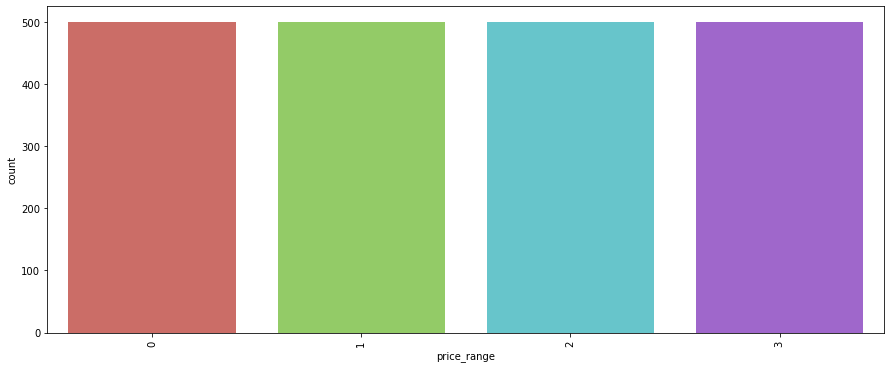

In [7]:
plt.figure(figsize=(15,6))
sns.countplot('price_range',data=Df,palette='hls')
plt.xticks(rotation=90)
plt.show()


In [8]:
#Independent Features (x)
#Feature bettery_power
Df['battery_power'].value_counts()

1872    6
1589    6
618     6
1413    5
1715    5
       ..
1199    1
1202    1
1203    1
1204    1
1998    1
Name: battery_power, Length: 1094, dtype: int64

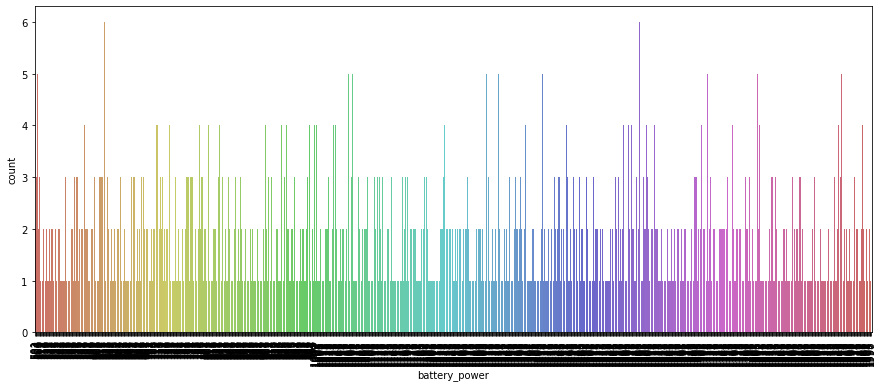

In [9]:
plt.figure(figsize=(15,6))
sns.countplot('battery_power',data=Df,palette='hls')
plt.xticks(rotation=90)
plt.show()


In [10]:
#Feature bettery_power
Df['clock_speed'].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
2.4     58
0.8     58
0.9     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

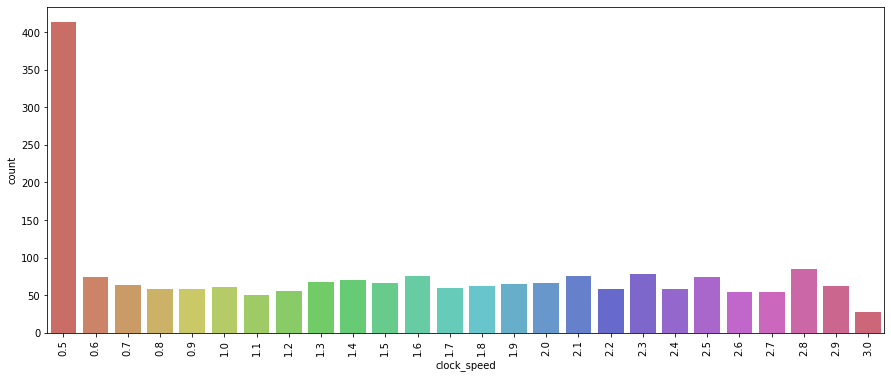

In [11]:
plt.figure(figsize=(15,6))
sns.countplot('clock_speed',data=Df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [12]:
#Feature dual_sim
Df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

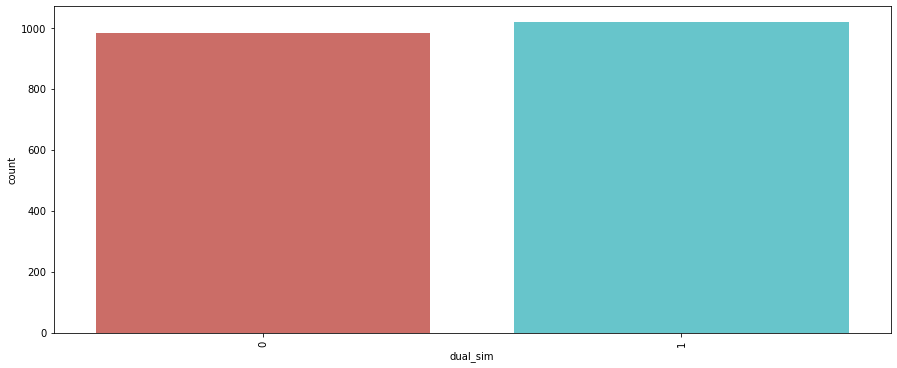

In [13]:
plt.figure(figsize=(15,6))
sns.countplot('dual_sim',data=Df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [14]:

#Feature dual_sim
Df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

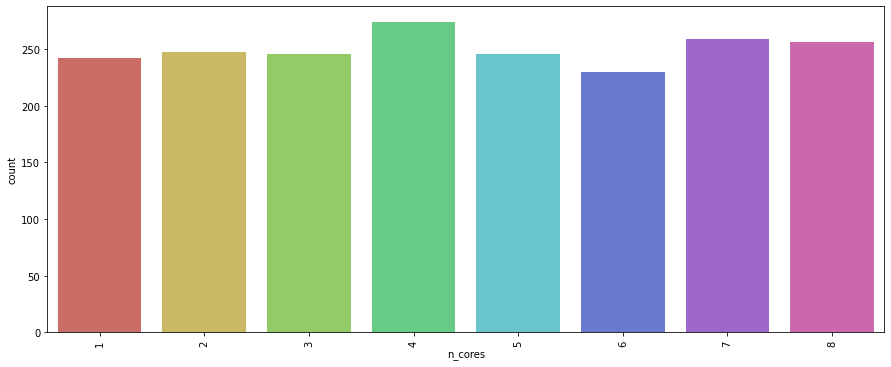

In [15]:
plt.figure(figsize=(15,6))
sns.countplot('n_cores',data=Df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [16]:
#Apply Machine Learning Model
# independent variables 
independent= Df.drop('price_range',axis='columns')
independent

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [17]:
dependent=Df["price_range"]
dependent.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.2)


In [19]:
#Using KNN Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. 
#We'll start with k=1.
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
classifier.score(X_train,y_train)

1.0

In [21]:
pred = classifier.predict(X_test)
print(pred)

[3 2 0 1 3 3 0 2 3 1 2 0 1 1 2 0 0 3 0 3 1 3 1 0 1 1 2 2 3 2 3 1 2 1 3 2 3
 2 2 0 1 0 0 1 0 2 0 2 2 1 2 2 2 1 2 2 2 3 0 3 3 2 1 1 0 1 1 1 3 1 2 3 3 1
 0 0 1 2 2 0 1 0 1 0 0 1 2 0 1 0 0 2 2 1 3 1 3 2 0 0 0 2 2 1 1 0 3 0 1 3 1
 1 3 1 3 1 0 1 0 0 0 0 2 1 3 1 3 3 2 2 3 1 1 1 0 2 1 2 1 3 0 2 2 0 0 3 3 0
 1 3 2 3 2 3 1 0 2 0 0 1 3 3 0 3 1 1 3 3 1 1 2 2 1 0 3 0 0 0 0 3 3 0 1 1 1
 3 3 2 0 0 0 2 0 3 3 2 3 2 2 0 1 3 1 2 3 2 3 3 3 0 3 1 1 2 1 2 3 1 0 0 0 3
 2 2 1 0 2 1 1 1 3 2 3 3 2 1 2 1 2 1 0 1 3 0 0 3 2 1 1 3 3 3 0 2 0 1 0 1 2
 1 3 1 1 1 1 0 2 1 2 3 0 3 3 1 0 0 2 2 2 2 2 3 2 0 3 0 3 0 1 2 3 3 1 1 2 0
 3 2 0 3 3 0 2 1 1 2 1 1 2 1 3 3 0 0 1 0 1 2 2 0 3 3 1 3 3 2 3 2 1 2 1 2 2
 0 0 3 0 3 1 0 1 3 0 1 2 2 0 1 1 3 0 3 2 1 3 3 0 1 1 1 2 3 0 1 0 2 1 3 1 0
 2 3 2 0 1 0 1 0 0 1 0 1 0 1 0 1 3 1 2 2 3 3 0 1 0 0 2 2 3 2]


In [22]:
print("Test set score:{:.2f}".format(np.mean(pred==y_test)))

Test set score:0.91


In [23]:
#Task 2 DataSet (2)
#Diabetes Dataset (Binary Calssification Problem)
df=pd.read_csv('Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
#Checking missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
#Checking Desciption
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
#DataVisualization 
# Dependent Variable (y=outcome)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

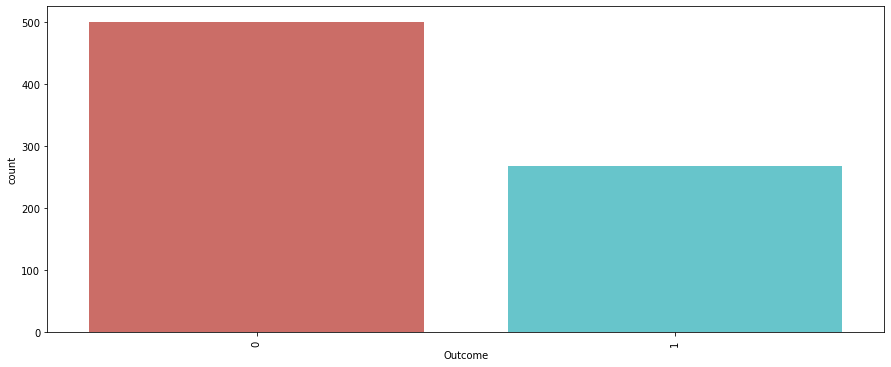

In [28]:
plt.figure(figsize=(15,6))
sns.countplot('Outcome',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [29]:
# InDependent Variable(x=Pregnancies)
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

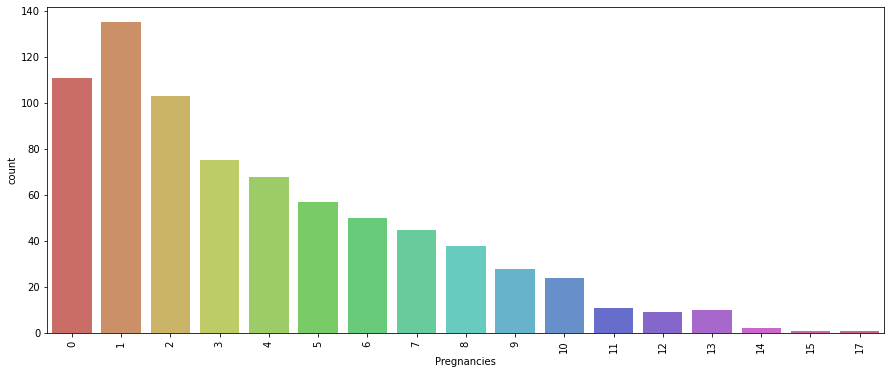

In [30]:
plt.figure(figsize=(15,6))
sns.countplot('Pregnancies',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [31]:
df['Glucose'].value_counts()

99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: Glucose, Length: 136, dtype: int64

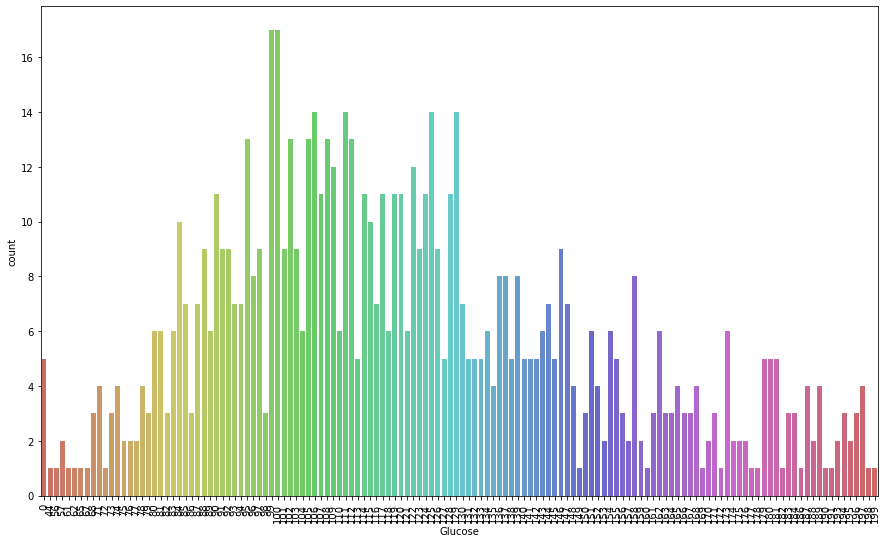

In [32]:
plt.figure(figsize=(15,9))
sns.countplot('Glucose',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

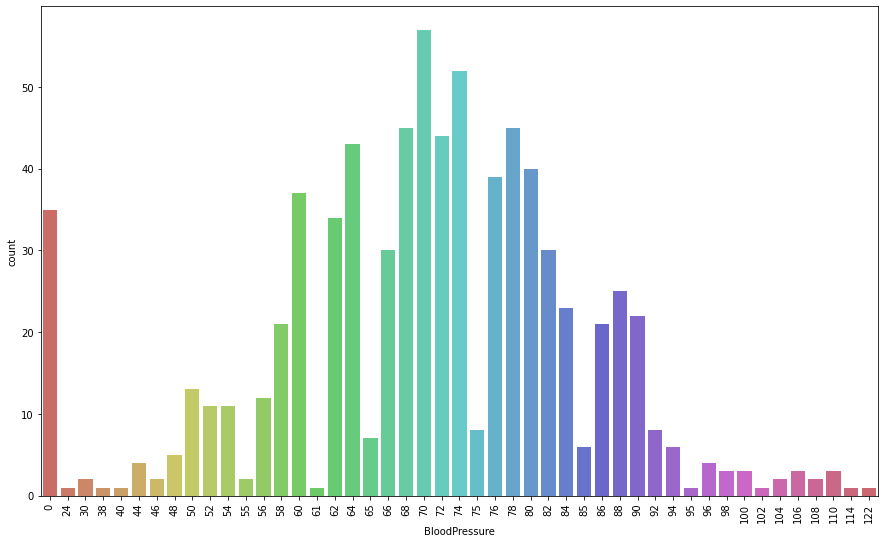

In [33]:
plt.figure(figsize=(15,9))
sns.countplot('BloodPressure',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

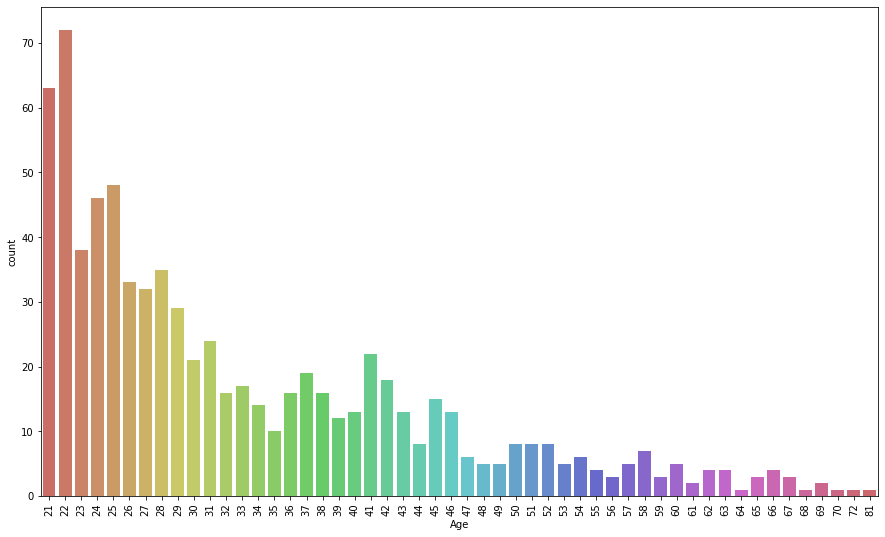

In [34]:

plt.figure(figsize=(15,9))
sns.countplot('Age',data=df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [35]:
# independent variables 
independent1= df.drop('Outcome',axis='columns')
independent1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [36]:
dependent1=df["Outcome"]
dependent1.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [37]:
#Applying Model:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent1,dependent1,test_size=0.2)

In [38]:
#Using KNN Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. 
#We'll start with k=1.
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
classifier1.score(X_train,y_train)

1.0

In [40]:
pred1 = classifier1.predict(X_test)
print(pred1)

[0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 0]


In [41]:
print("Test set score:{:.2f}".format(np.mean(pred1==y_test)))

Test set score:0.67


In [42]:
#Using KNN Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. 
#We'll start with k=3.
from sklearn.neighbors import KNeighborsClassifier
classifier2=KNeighborsClassifier(n_neighbors=3)
classifier2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
classifier2.score(X_train,y_train)

0.8485342019543974

In [44]:
pred2 = classifier2.predict(X_test)
print(pred2)

[0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1
 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0]


In [45]:
print("Test set score:{:.2f}".format(np.mean(pred2==y_test)))

Test set score:0.72


In [46]:
#Using KNN Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. 
#We'll start with k=1.
from sklearn.neighbors import KNeighborsClassifier
classifier3=KNeighborsClassifier(n_neighbors=5)
classifier3.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
classifier3.score(X_train,y_train)

0.7915309446254072

In [48]:
pred3 = classifier3.predict(X_test)
print(pred3)

[0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0]


In [49]:
print("Test set score:{:.2f}".format(np.mean(pred3==y_test)))

Test set score:0.77
